<h3> Understanding the Data </h3>

<b> Check the structure </b> - How many rows and columns? <br>
<b> Look at the column names </b> - Are there typos or consistencies?</br>
<b> Check the datatypes </b> - Are numbers stored as texts? are dates formatted correctly?</br>
<b> identify missing or consitent values </b>

In [807]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [808]:
df = pd.read_csv('D://messy_transaction.csv')
df

,Transaction ID,Customer Name,Email,Age,City,Transaction Date,Product Category,Amount ($),Payment Method,Review
0,718969,Grace,+63 917 848()0427,80,New York,29/05/2023,Home & Kitchen,NaN,PayPal,!!!Extra punctuation???
1,480570,Bob,09454470547,31,NaN,NaN,Electronics,10000,debit_card,Data cleaning is necessary...
2,761860,Alice,0998-421()7989,23,Maimi,"December 20, 2023",Boks,10000,CASH,"Messy, text with spaces!"
3,414220,Henry,0998 3003209,54,San Francisco,"March 22, 2023",Groceries,10000,PayPal,This is a sample review.
4,130403,David,0917 894()3535,twenty,Seattl,"February 21, 2023",Boks,266.0598752443908,PayPal,"Messy, text with spaces!"
...,...,...,...,...,...,...,...,...,...,...
2305,621995,Eva,0917-795()0215,twenty,Maimi,NaN,Groceries,1K,paypal,This is a sample review.
2306,261557,Alice,+63 998988.5528,NaN,Nw York,24/08/2023,Home & Kitchen,10000,Credit Card,lots of spaces here
2307,237136,Alice,0945.2195043,150,San Fransisco,2023-09-11,Electrnics,391.71980058668044,credit card,Some RANDOM capitalization issueS
2308,831339,Grace,0998()0396326,twenty,Chcago,"September 04, 2023",Toys,NaN,credit card,NaN


<h4> Check the Basic Information </h4>

In [809]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    2310 non-null   int64 
 1   Customer Name     2310 non-null   object
 2   Email             2310 non-null   object
 3   Age               1553 non-null   object
 4   City              2162 non-null   object
 5   Transaction Date  1766 non-null   object
 6   Product Category  2310 non-null   object
 7   Amount ($)        1678 non-null   object
 8   Payment Method    2092 non-null   object
 9   Review            1811 non-null   object
dtypes: int64(1), object(9)
memory usage: 180.6+ KB
None


In [810]:
df.dtypes

Transaction ID       int64
Customer Name       object
Email               object
Age                 object
City                object
Transaction Date    object
Product Category    object
Amount ($)          object
Payment Method      object
Review              object
dtype: object

<h3> Check for Missing Values and Duplicates </h3>

In [811]:
df.isnull().sum()

Transaction ID        0
Customer Name         0
Email                 0
Age                 757
City                148
Transaction Date    544
Product Category      0
Amount ($)          632
Payment Method      218
Review              499
dtype: int64

In [812]:
df.duplicated().sum()

210

In [813]:
#check which specific rows has duplicates
duplicate_rows = df[df.duplicated(keep = False)]

#if we want only the indices
duplicate_index = df[df.duplicated()].index
print(duplicate_index.tolist())

[2100, 2101, 2102, 2103, 2104, 2105, 2106, 2107, 2108, 2109, 2110, 2111, 2112, 2113, 2114, 2115, 2116, 2117, 2118, 2119, 2120, 2121, 2122, 2123, 2124, 2125, 2126, 2127, 2128, 2129, 2130, 2131, 2132, 2133, 2134, 2135, 2136, 2137, 2138, 2139, 2140, 2141, 2142, 2143, 2144, 2145, 2146, 2147, 2148, 2149, 2150, 2151, 2152, 2153, 2154, 2155, 2156, 2157, 2158, 2159, 2160, 2161, 2162, 2163, 2164, 2165, 2166, 2167, 2168, 2169, 2170, 2171, 2172, 2173, 2174, 2175, 2176, 2177, 2178, 2179, 2180, 2181, 2182, 2183, 2184, 2185, 2186, 2187, 2188, 2189, 2190, 2191, 2192, 2193, 2194, 2195, 2196, 2197, 2198, 2199, 2200, 2201, 2202, 2203, 2204, 2205, 2206, 2207, 2208, 2209, 2210, 2211, 2212, 2213, 2214, 2215, 2216, 2217, 2218, 2219, 2220, 2221, 2222, 2223, 2224, 2225, 2226, 2227, 2228, 2229, 2230, 2231, 2232, 2233, 2234, 2235, 2236, 2237, 2238, 2239, 2240, 2241, 2242, 2243, 2244, 2245, 2246, 2247, 2248, 2249, 2250, 2251, 2252, 2253, 2254, 2255, 2256, 2257, 2258, 2259, 2260, 2261, 2262, 2263, 2264, 2265, 226

<h3>  Tackling Common Data Issues Across All Columns </h3>

<h4> Modification of Column Names </h4> 

In [814]:
#To change a speficic column

df = df.rename(columns = { 'Transaction ID' : 'transaction_id',
                           'Customer Name' : 'customer_name',
                            'Email' : 'phone_number',
                            'Age' : 'age',
                            'City' : 'city',
                            'Transaction Date' : 'transaction_date',
                             'Product Category' : 'product_category',
                             'Amount ($)': 'amount',
                              'Payment Method' : 'payment_method',
                              'Review' : 'review'
 })


#to change all the spaces in the columns (only if all the columns has the same datatype)

#df.columns = df.str.replace(' ', '_').str.lower()

<h4> Dropping Duplicates </h4>

In [815]:
df = df.drop_duplicates()

In [816]:
df.duplicated().sum()

0

<h3> Clean Each Column </h3>

In [817]:
df.columns

Index(['transaction_id', 'customer_name', 'phone_number', 'age', 'city',
       'transaction_date', 'product_category', 'amount', 'payment_method',
       'review'],
      dtype='object')

<h4> For Customer Name </h4>

In [818]:
# to remove white spaces
df.loc[:, 'customer_name'] = df['customer_name'].str.strip()

#to standardize capitalization
df.loc[:, 'customer_name'] = df['customer_name'].str.title()

In [819]:
#Check for invalid characters
df.loc[:, 'customer_name'] = df['customer_name'].str.replace(r'[^a-zA-Z\s]', '', regex = True)

<h4> For Phone Number </h4>

In [820]:
print(df['phone_number'])

0       +63 917 848()0427
1             09454470547
2          0998-421()7989
3            0998 3003209
4          0917 894()3535
              ...        
2095       0920.793()4135
2096      +63 920.3608516
2097     +63 920-982-4644
2098     +63 920-021.0027
2099       0998 758()9228
Name: phone_number, Length: 2100, dtype: object


In [821]:
#replace invalid characters
df['phone_number'] = df['phone_number'].str.replace(r'[()-.]', '', regex = True)

In [822]:
#remove white spaces
df.loc[:,'phone_number'] = df['phone_number'].str.strip()

#remove spaces in betwee
df['phone_number'] = df['phone_number'].str.replace(' ', '', regex = True)

In [823]:
df

,transaction_id,customer_name,phone_number,age,city,transaction_date,product_category,amount,payment_method,review
0,718969,Grace,639178480427,80,New York,29/05/2023,Home & Kitchen,NaN,PayPal,!!!Extra punctuation???
1,480570,Bob,09454470547,31,NaN,NaN,Electronics,10000,debit_card,Data cleaning is necessary...
2,761860,Alice,09984217989,23,Maimi,"December 20, 2023",Boks,10000,CASH,"Messy, text with spaces!"
3,414220,Henry,09983003209,54,San Francisco,"March 22, 2023",Groceries,10000,PayPal,This is a sample review.
4,130403,David,09178943535,twenty,Seattl,"February 21, 2023",Boks,266.0598752443908,PayPal,"Messy, text with spaces!"
...,...,...,...,...,...,...,...,...,...,...
2095,551267,Eva,09207934135,150,Seattl,04/03/2023,Electronics,three hundred,Cash,!!!Extra punctuation???
2096,765004,Grace,639203608516,-5,Los Angeles,03/02/2023,Sprts,1K,NaN,This is a sample review.
2097,150839,Eva,639209824644,twenty,Chicago,03/12/2023,Toys,21.572884735974835,Debit Card,lots of spaces here
2098,689611,Bob,639200210027,150,New York,23/05/2023,Home & Kitchen,-50,CASH,Data cleaning is necessary...


In [824]:
df['phone_number'] = df['phone_number'].apply(lambda x: x if x.startswith('0') else '0' + x.lstrip('63'))

In [825]:
df

,transaction_id,customer_name,phone_number,age,city,transaction_date,product_category,amount,payment_method,review
0,718969,Grace,09178480427,80,New York,29/05/2023,Home & Kitchen,NaN,PayPal,!!!Extra punctuation???
1,480570,Bob,09454470547,31,NaN,NaN,Electronics,10000,debit_card,Data cleaning is necessary...
2,761860,Alice,09984217989,23,Maimi,"December 20, 2023",Boks,10000,CASH,"Messy, text with spaces!"
3,414220,Henry,09983003209,54,San Francisco,"March 22, 2023",Groceries,10000,PayPal,This is a sample review.
4,130403,David,09178943535,twenty,Seattl,"February 21, 2023",Boks,266.0598752443908,PayPal,"Messy, text with spaces!"
...,...,...,...,...,...,...,...,...,...,...
2095,551267,Eva,09207934135,150,Seattl,04/03/2023,Electronics,three hundred,Cash,!!!Extra punctuation???
2096,765004,Grace,09203608516,-5,Los Angeles,03/02/2023,Sprts,1K,NaN,This is a sample review.
2097,150839,Eva,09209824644,twenty,Chicago,03/12/2023,Toys,21.572884735974835,Debit Card,lots of spaces here
2098,689611,Bob,09200210027,150,New York,23/05/2023,Home & Kitchen,-50,CASH,Data cleaning is necessary...


In [826]:
#check if there are indices/ rows that has values longer than 11 to ensure there's no error in transforming the contact numbers
invalid_index = df[df['phone_number'].apply(lambda x: len(x) != 11)].index
print(invalid_index)

Index([], dtype='int64')


<h4> For Age </h4>

In [827]:
#convert the values to numeric and all the non-numeric will become NaN

df['age'] = pd.to_numeric(df['age'], errors= 'coerce')

In [828]:
df['age']

0        80.0
1        31.0
2        23.0
3        54.0
4         NaN
        ...  
2095    150.0
2096     -5.0
2097      NaN
2098    150.0
2099    150.0
Name: age, Length: 2100, dtype: float64

In [829]:
#identify negative values
negs = (df['age'] < 0).sum()
print(negs)

361


In [830]:
#replace negative values with NaN
df['age'] = df['age'].apply(lambda x: x if x >= 0 else np.nan)

Text(0.5, 1.0, 'Oulier Check')

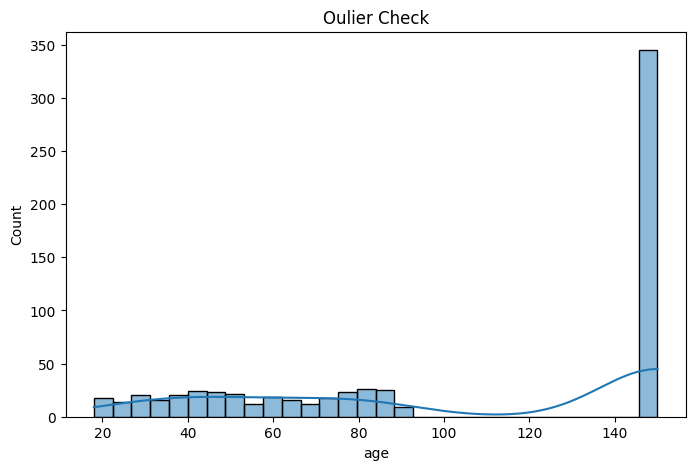

In [831]:
#check for outliers
plt.figure(figsize = (8,5))
sns.histplot(df['age'], bins=30, kde = True)
plt.title("Oulier Check")

In [832]:
#the outliers are unreasonable thus we can decide to replace it with NaN
df['age'] = df['age'].apply(lambda x: x if x <100 else np.nan)

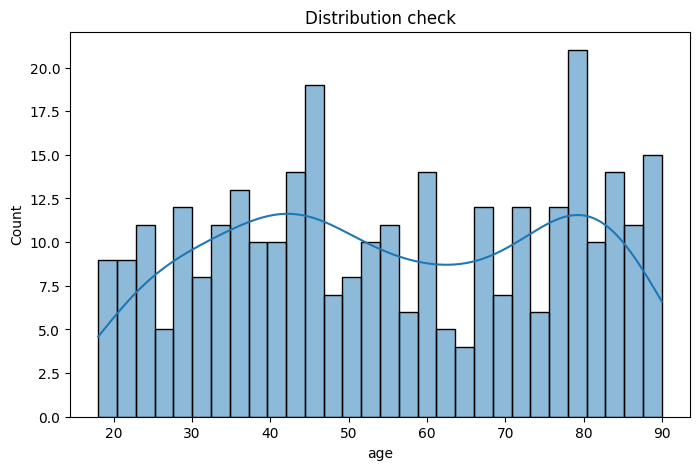

In [833]:
#check the distribution
plt.figure(figsize = (8,5))
sns.histplot(df['age'], bins = 30, kde = True)
plt.title('Distribution check')
plt.show()

<h5> Handling NaN Values </h5>

In [834]:
#first we need to understand the percentage of NaN values to the age data
nan_sum = df['age'].isnull().sum()
age_row_count = len(df['age'])

nan_age_percentage = (nan_sum / age_row_count)*100
print(nan_age_percentage)

84.95238095238096


In [835]:
#if the percent ratio is lower than 10-15% get the mean or median
#if the percent ratio is higher than 10-15% we have to use machine learning algorithm if the result is not ideal then the last ersort is to drop the column


# Using KNN imputation technique
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=10)
df[['age']] = imputer.fit_transform(df[['age']])

In [836]:
df['age'] = df['age'].round(1)

<Axes: xlabel='age', ylabel='Count'>

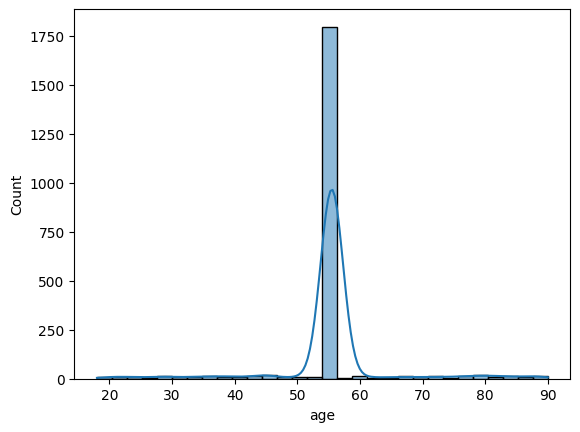

In [837]:
sns.histplot(df['age'], bins=30, kde=True)

In [838]:
#The result is not ideal so the last resort is to drop the age column
#df.drop(columns = ['age'])

<h3> For City </h3>

In [839]:
#handle NaN values first
df['city'] = df['city'].fillna('')


<h5> Dealing with incorrect spelling </h5>

In [840]:
#for minor incorrect spelling we can use TextBlob
%pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [841]:
#For more complex incorrect spelling we can use Fuzzywuzzy
%pip install fuzzywuzzy

Note: you may need to restart the kernel to use updated packages.


In [842]:
#to know the unique values
df['city'].unique()

array(['New York', '', 'Maimi', 'San Francisco', 'Seattl', 'Los Angeles',
       'Huston', 'Seattle', 'Chcago', 'Chicago', 'Nw York', 'Los Angeels',
       'Miami', 'San Fransisco', 'Houston'], dtype=object)

In [843]:
from fuzzywuzzy import process

valid_cities = ['New York', 'Miami', 'San Francisco', 'Seattle', 'Los Angeles', 'Boston',
                'Chicago', 'Houston']
def correct_city_name(city, valid_cities):
    closest_match, score = process.extractOne(city, valid_cities)
    return closest_match if score > 80 else city

#apply the function
df['city'] = df['city'].apply(lambda x: correct_city_name(x, valid_cities))

In [844]:
#Only Miami is inconsitent so I choose to replace all incoorect Miami
df['city'] = df['city'].str.replace('Maimi', 'Miami')

In [845]:
df['city'].unique()

array(['New York', '', 'Miami', 'San Francisco', 'Seattle', 'Los Angeles',
       'Houston', 'Chicago'], dtype=object)

In [846]:
#for the city with no values we can choose to retain it or replace it with 'Unknown'
df

,transaction_id,customer_name,phone_number,age,city,transaction_date,product_category,amount,payment_method,review
0,718969,Grace,09178480427,80.0,New York,29/05/2023,Home & Kitchen,NaN,PayPal,!!!Extra punctuation???
1,480570,Bob,09454470547,31.0,,NaN,Electronics,10000,debit_card,Data cleaning is necessary...
2,761860,Alice,09984217989,23.0,Miami,"December 20, 2023",Boks,10000,CASH,"Messy, text with spaces!"
3,414220,Henry,09983003209,54.0,San Francisco,"March 22, 2023",Groceries,10000,PayPal,This is a sample review.
4,130403,David,09178943535,55.5,Seattle,"February 21, 2023",Boks,266.0598752443908,PayPal,"Messy, text with spaces!"
...,...,...,...,...,...,...,...,...,...,...
2095,551267,Eva,09207934135,55.5,Seattle,04/03/2023,Electronics,three hundred,Cash,!!!Extra punctuation???
2096,765004,Grace,09203608516,55.5,Los Angeles,03/02/2023,Sprts,1K,NaN,This is a sample review.
2097,150839,Eva,09209824644,55.5,Chicago,03/12/2023,Toys,21.572884735974835,Debit Card,lots of spaces here
2098,689611,Bob,09200210027,55.5,New York,23/05/2023,Home & Kitchen,-50,CASH,Data cleaning is necessary...


<h3> For Transaction Date </h3>

In [847]:
from dateutil.parser import parse

df['transaction_date'] = df['transaction_date'].apply(lambda x: parse(str(x)).strftime('%m,%d,%Y') if pd.notnull(x) else x) 

In [848]:
df

,transaction_id,customer_name,phone_number,age,city,transaction_date,product_category,amount,payment_method,review
0,718969,Grace,09178480427,80.0,New York,"05,29,2023",Home & Kitchen,NaN,PayPal,!!!Extra punctuation???
1,480570,Bob,09454470547,31.0,,NaN,Electronics,10000,debit_card,Data cleaning is necessary...
2,761860,Alice,09984217989,23.0,Miami,"12,20,2023",Boks,10000,CASH,"Messy, text with spaces!"
3,414220,Henry,09983003209,54.0,San Francisco,"03,22,2023",Groceries,10000,PayPal,This is a sample review.
4,130403,David,09178943535,55.5,Seattle,"02,21,2023",Boks,266.0598752443908,PayPal,"Messy, text with spaces!"
...,...,...,...,...,...,...,...,...,...,...
2095,551267,Eva,09207934135,55.5,Seattle,"04,03,2023",Electronics,three hundred,Cash,!!!Extra punctuation???
2096,765004,Grace,09203608516,55.5,Los Angeles,"03,02,2023",Sprts,1K,NaN,This is a sample review.
2097,150839,Eva,09209824644,55.5,Chicago,"03,12,2023",Toys,21.572884735974835,Debit Card,lots of spaces here
2098,689611,Bob,09200210027,55.5,New York,"05,23,2023",Home & Kitchen,-50,CASH,Data cleaning is necessary...


In [849]:
#remove special characters
df['transaction_date'] = df['transaction_date'].str.replace(r'[/,-.]','', regex = True)
#omit spacings
df['transaction_date'] = df['transaction_date'].str.replace(' ','', regex = True)
# remove nan values
df['transaction_date'] = df['transaction_date'].fillna('')

<h5> Manual Way of Changing the Month </h5>

In [850]:
#Separate using '/'
df['transaction_date'] = df['transaction_date'].apply(lambda x: f"{x[0:2]}/{x[2:4]}/{x[4:]}" if pd.notnull(x) and len(x) == 8 else x)

In [851]:
# Convert to datetime, invalid dates become NaT
df['transaction_date'] = pd.to_datetime(df['transaction_date'], format='%m/%d/%Y', errors='coerce')
# Replace NaT with blank string ('') or None
#df['transaction_date'] = df['transaction_date'].apply(lambda x: '' if pd.isna(x) else x)

In [852]:
#to ensure that the values will only return dates
df['transaction_date'] = df['transaction_date'].dt.date

<h3> For Product Category </h3>

In [853]:
df['product_category'].unique()

array(['Home & Kitchen', 'Electronics', 'Boks', 'Groceries', 'Toys',
       'Sprts', 'Clothng', 'Clothing', 'Hme & Kitchen', 'Sports', 'Toyss',
       'Electrnics', 'Grocereis', 'Books'], dtype=object)

In [854]:
category_mapping = {
    'Hme & Kitchen' : 'Home & Kitchen',
    'Electrnics' : 'Electronics',
    'Boks' : 'Books',
    'Grocereis' : 'Groceries',
    'Toyss' : 'Toys',
    'Sprts' : 'Sports',
    'Clothng' : 'Clothing'
}

#change the dtype to string first
df['product_category'] = df['product_category'].astype(str)

#change the wrong and map the right spelling
for wrong, right in category_mapping.items():
    df['product_category'] = df['product_category'].str.replace(wrong,right, case = False, regex = False )

In [855]:
df['product_category'].unique()

array(['Home & Kitchen', 'Electronics', 'Books', 'Groceries', 'Toys',
       'Sports', 'Clothing'], dtype=object)

In [856]:
df['product_category'].isnull().sum()

0

<h3> For Amount </h3>

In [857]:
#check null values
df['amount'].isnull().sum()

577

<h4> Converting Textual Numbers to Numberic Values </h4>

In [858]:
%pip install word2number

Note: you may need to restart the kernel to use updated packages.


In [859]:
#check which textual Numbers to convert 
df['amount'].unique()

array([nan, '10000', '266.0598752443908', '-50', '1K',
       '413.64956332318377', '26.407233375462262', '415.67398439051397',
       'three hundred', '431.6820999429471', '215.59559518783894',
       '210.82348105461207', '38.11793389355401', '36.053397156622495',
       '407.9024743024734', '186.65078529674045', '313.73651522287093',
       '437.2799612858418', '499.6303959770331', '27.197821091862682',
       '333.9669572883428', '304.5588261095787', '94.27161602205729',
       '197.29875554377193', '143.66715238600122', '253.32360366760267',
       '271.8219185994783', '469.0748219898675', '52.34916614989301',
       '23.672190998165085', '150.52078481645412', '140.50575685824984',
       '31.724671779137285', '39.98338686266458', '295.8583234843202',
       '242.39340102634776', '297.44591258564174', '308.33220252804585',
       '139.82870128938305', '333.845070967309', '395.61191012022937',
       '255.7807104906842', '320.7737484549852', '489.1848697929453',
       '448.3101380

In [860]:
#execute word2number
from word2number import w2n

#for 300
text = 'three hundred'
numeric_value = w2n.word_to_num(text)

#apply
df['amount'] = df['amount'].apply(lambda x: numeric_value if x=='three hundred' else x)

In [861]:
#resolve the 1K
#we can use lambda function

df['amount'] = df['amount'].apply(lambda x: 1000 if x=='1K' else x)

In [862]:
#omitting negative values
df['amount'] = df['amount'].str.replace('-50', '')

In [863]:
#change the datatype into numeric
df['amount'] = pd.to_numeric(df['amount'], errors = 'coerce')

#we can written NaN values since NaN is better than '' when working with numbers or databases.

In [864]:
#Limit the decimal places to 2
df['amount'] = df['amount'].round(2)

<Axes: xlabel='amount', ylabel='Count'>

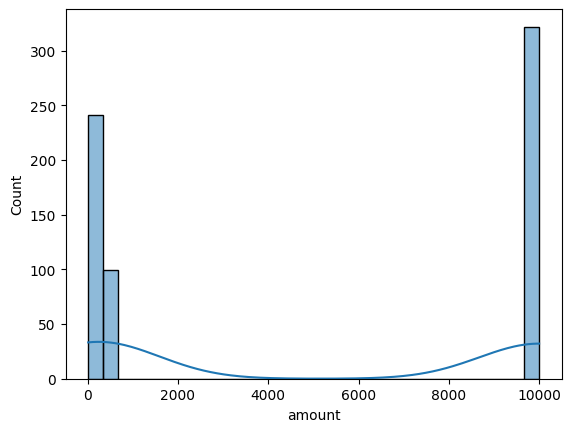

In [865]:
sns.histplot(df['amount'], bins=30, kde=True)

Now, we can see that 10000 appears frequently we must understand if this value is an outlier. We can get its ratio between the valid values.<br>
Note: Use only valid (non-NaN) values for outlier detection and proportion analysis beacuse you can only assess distribution among actual, valid values.

In [866]:
count_1000 = (df['amount'] == 10000).sum()
count_valid = count_valid = df['amount'].dropna().shape[0]

ratio = (count_1000/count_valid)*100
print(ratio)

48.6404833836858


Since ratio = 48.64 %, this is a strong indication that 10000 is not an outlier, but rather a mode (a value that repeats frequently).

<h3> Payment Method </h3>

<h4> Hadling Text Cases </h4>

In [867]:
#convert the values into lower case
df['payment_method'] = df['payment_method'].str.lower()

In [868]:
#remove underscores and replace spaces instead
df['payment_method'] = df['payment_method'].str.replace('_',' ')

In [869]:
df['payment_method'].isnull().sum()

199

In [870]:
df['payment_method'].unique()

array(['paypal', 'debit card', 'cash', nan, 'credit card', 'credit card '],
      dtype=object)

<h3> For Reviewv</h3> 

In [871]:
#we can just drop this column since it is not important
df = df.drop(columns = ['review'])

In [872]:
#To clean the data set entirely I decided to omit all the age values that was predicted by KNN
df['age'] = df['age'].apply(lambda x: '' if x == 55.5 else x)

In [873]:
df

,transaction_id,customer_name,phone_number,age,city,transaction_date,product_category,amount,payment_method
0,718969,Grace,09178480427,80.0,New York,2023-05-29,Home & Kitchen,NaN,paypal
1,480570,Bob,09454470547,31.0,,NaT,Electronics,10000.00,debit card
2,761860,Alice,09984217989,23.0,Miami,2023-12-20,Books,10000.00,cash
3,414220,Henry,09983003209,54.0,San Francisco,2023-03-22,Groceries,10000.00,paypal
4,130403,David,09178943535,,Seattle,2023-02-21,Books,266.06,paypal
...,...,...,...,...,...,...,...,...,...
2095,551267,Eva,09207934135,,Seattle,2023-04-03,Electronics,NaN,cash
2096,765004,Grace,09203608516,,Los Angeles,2023-03-02,Sports,NaN,NaN
2097,150839,Eva,09209824644,,Chicago,2023-03-12,Toys,21.57,debit card
2098,689611,Bob,09200210027,,New York,2023-05-23,Home & Kitchen,NaN,cash


<h2> Saving File to CSV or Excel </h2>

In [874]:
df.to_csv('customer_transaction_cleaned.csv', index = False)

In [875]:
df.to_excel('customer_transaction_cleaned.xlsx', index = False)